In [1]:
import pygmo as pg
import matplotlib.pyplot as plt
import numpy as np
import sys
import json
reload(sys)  
sys.setdefaultencoding('utf-8')

## Instantiate a pygmo problem

In [2]:
import pandas as pd

problems_df = pd.DataFrame.from_csv('problems.csv', sep=';')
problems_df['Best Fitness'] = 0.0
problems_df['Number of Evaluations'] = 0
problems_df['Closeness to Global Minimal'] = 0.0
problems_df['log'] = ''

In [3]:
problem_id = 5
prob = pg.problem(pg.cec2014(dim=2, prob_id=problem_id))

## Instantiate a pygmo algorithm

In [4]:
algo = pg.algorithm(pg.sga(gen       = 100000, 
                           cr        = 0.9,
                           m         = 0.2,
                           param_m   = 0.2,
                           param_s   = 10,
                           crossover = 'single',
                           mutation  = 'gaussian',
                           selection = 'tournament',
                           seed      = 42))

## Initialize Population

In [5]:
pop = pg.population(prob=prob, size = 100)

## Evolve

In [6]:
algo.set_verbosity(1)
pop = algo.evolve(pop)
uda = algo.extract(pg.sga)

In [7]:
problems_df['Best Fitness'][problem_id] = pop.get_f()[pop.best_idx()]
problems_df['Closeness to Global Minimal'][problem_id] = problems_df['Global Minimal'][problem_id] / problems_df['Best Fitness'][problem_id]

In [8]:
log = uda.get_log()

In [9]:
fitness_over_time = [x[2] for x in log]
problems_df['log'][problem_id] = json.dumps(log)
nb_evals = [x[1] for x in log]
problems_df['Number of Evaluations'][problem_id] = nb_evals[-1]

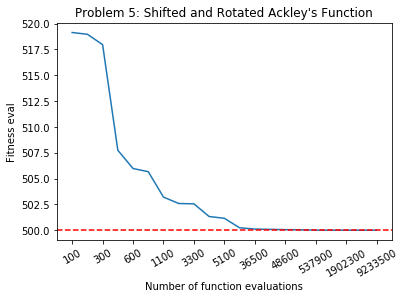

In [10]:
plt.plot(fitness_over_time)
plt.xticks(np.arange(len(nb_evals))[::len(nb_evals)/8], nb_evals[::len(nb_evals)/8], rotation = 30)

plt.axhline(y=problems_df['Global Minimal'][problem_id], color='r', linestyle='--')
plt.xlabel('Number of function evaluations')
plt.ylabel('Fitness eval')
plt.title('Problem %d: %s'%(problem_id, problems_df['Function Name'][problem_id]))
plt.show()

In [11]:
pd.options.display.float_format = '{:,.8f}'.format
problems_df[problems_df.columns[problems_df.columns != 'log']]
#problems_df[filter(lambda column: column != 'log', problems_df.columns)]

,Function Name,Global Minimal,Best Fitness,Number of Evaluations,Closeness to Global Minimal
Index,,,,,
1,Rotated High Conditioned Elliptic Function,100,0.00000000,0,0.00000000
2,Rotated Bent Cigar Function,200,0.00000000,0,0.00000000
3,Rotated Discus Function,300,0.00000000,0,0.00000000
4,Shifted and Rotated Rosenbrock's Function,400,0.00000000,0,0.00000000
5,Shifted and Rotated Ackley's Function,500,500.00030193,9233500,0.99999940
6,Shifted and Rotated Weierstrass Function,600,0.00000000,0,0.00000000
7,Shifted and Rotated Griewank's Function,700,0.00000000,0,0.00000000
8,Shifted Rastrigin's Function,800,0.00000000,0,0.00000000
9,Shifted and Rotated Rastrigin's Function,900,0.00000000,0,0.00000000


In [12]:
problems_df.to_csv('results_pre.csv', sep = ';')